In [2]:
#Required libraries are imported
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
#py.init_notebook_mode(connected=True)
import plotly.tools as tls
import gzip
import calendar
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#from google.colab import drive
#drive.mount('/gdrive')

In [4]:
cd /content/drive/My\ Drive/Colab\ Notebooks/Capstone_Pranay_SBPRS

[WinError 3] The system cannot find the path specified: '/content/drive/My\\ Drive/Colab\\ Notebooks/Capstone_Pranay_SBPRS'
C:\Users\aakis\Documents\UiPath


In [5]:
#importing the dataset and getting the initial feel of the data
df = pd.read_csv("sample30.csv", sep=',')
df.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


#Analysing the data for Shape and missing values

In [6]:
#Analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
print("printing the missing value count :")
print(df.isnull().sum())

printing the missing value count :
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


In [8]:
#finding the missing values
print("missing values percentage is :")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).round(3)

missing values percentage is :


reviews_userProvince    99.433
reviews_userCity        93.570
reviews_didPurchase     46.893
reviews_doRecommend      8.567
reviews_title            0.633
manufacturer             0.470
reviews_username         0.210
reviews_date             0.153
user_sentiment           0.003
reviews_text             0.000
reviews_rating           0.000
name                     0.000
categories               0.000
brand                    0.000
id                       0.000
dtype: float64

#performing EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
%matplotlib inline

In [10]:
# Dropping the columns with 20 percentage of missing values
missing_values_threshold = len(df) * .2
df.dropna(thresh = missing_values_threshold, axis = 1, inplace = True)
print("Percentage of the missing values :")
print(df.isna().mean().round(5) * 100)

Percentage of the missing values :
id                      0.000
brand                   0.000
categories              0.000
manufacturer            0.470
name                    0.000
reviews_date            0.153
reviews_didPurchase    46.893
reviews_doRecommend     8.567
reviews_rating          0.000
reviews_text            0.000
reviews_title           0.633
reviews_username        0.210
user_sentiment          0.003
dtype: float64


In [11]:
#on the reviews_doRecommend column, replace null values with "Null"
df['reviews_doRecommend'].fillna('Null', inplace=True)


In [12]:
df['reviews_doRecommend'].value_counts()

True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

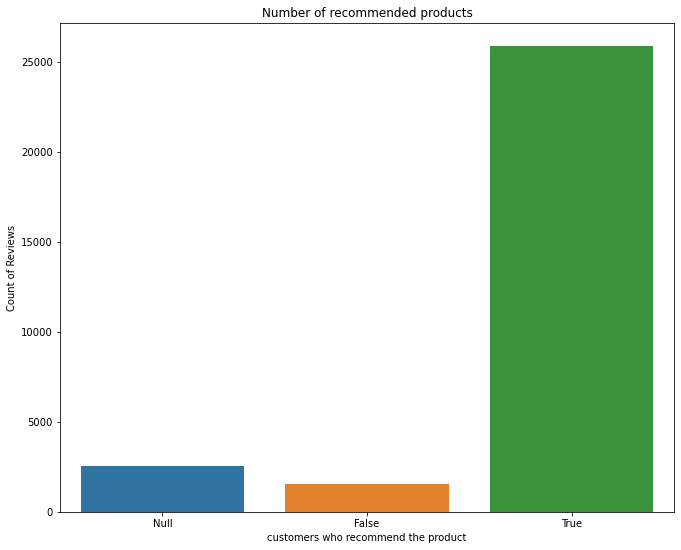

In [13]:
#analysing the distrubution of the column reviews_didpurchased

plt.figure(figsize=(11,9))
anx = sns.countplot(df['reviews_doRecommend'])
anx.axes.set_title('Number of recommended products')
anx.set_xlabel(xlabel="customers who recommend the product")
anx.set_ylabel(ylabel='Count of Reviews')
plt.show()


In [14]:
#replace null values in the column reviews_didpurchase "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

In [15]:
df['reviews_didPurchase'].value_counts()

False    14498
Null     14068
True      1434
Name: reviews_didPurchase, dtype: int64

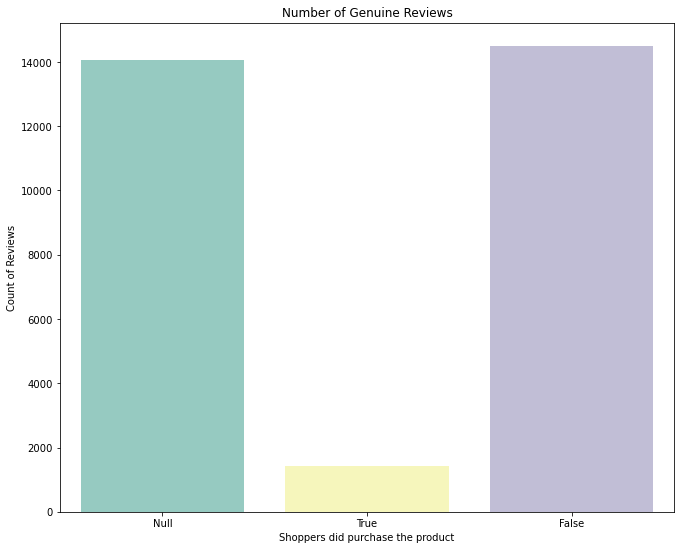

In [16]:
#Analysing the distribution of the column reviews_didpurchased

plt.figure(figsize=(11,9))
anx = sns.countplot(df['reviews_didPurchase'],palette="Set3")
anx.axes.set_title('Number of Genuine Reviews')
anx.set_xlabel(xlabel="Shoppers did purchase the product")
anx.set_ylabel(ylabel='Count of Reviews')
plt.show()


In [17]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

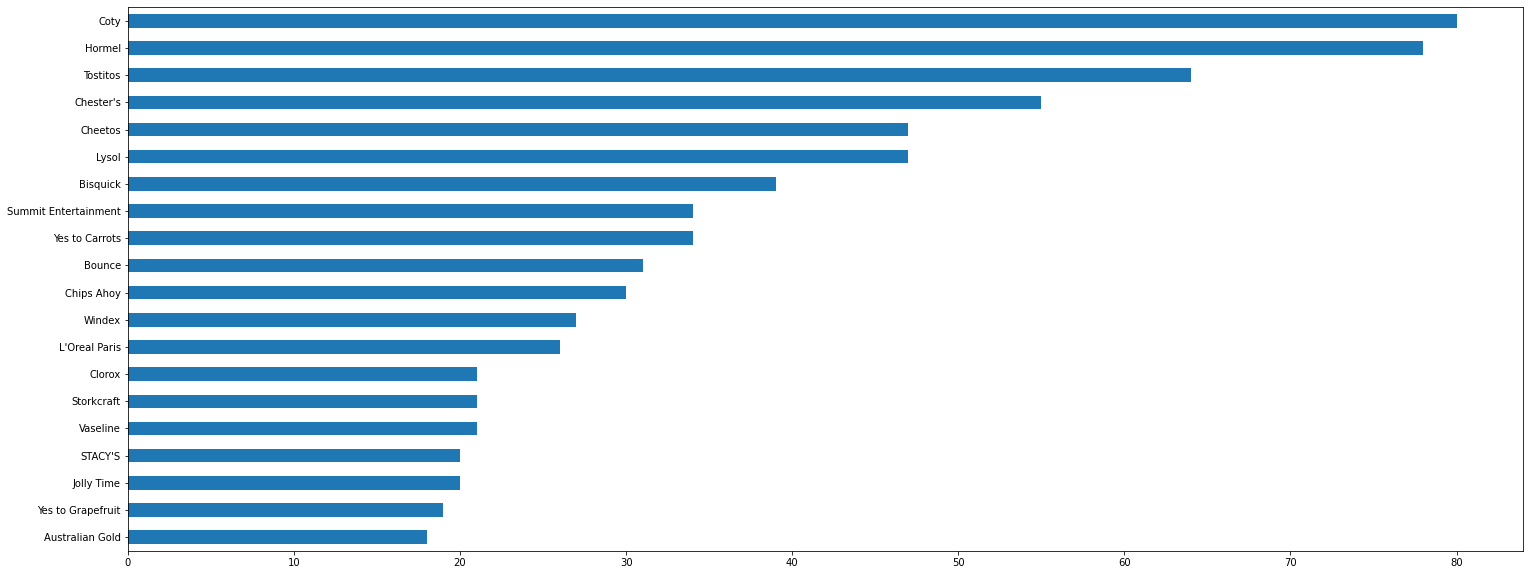

In [18]:
# top 10 most trusted brands(depending upon the positive review)
trusted_result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Positive")]
trusted_result['brand'].value_counts()[0:20].plot(kind = 'barh', figsize=[25,10]).invert_yaxis()

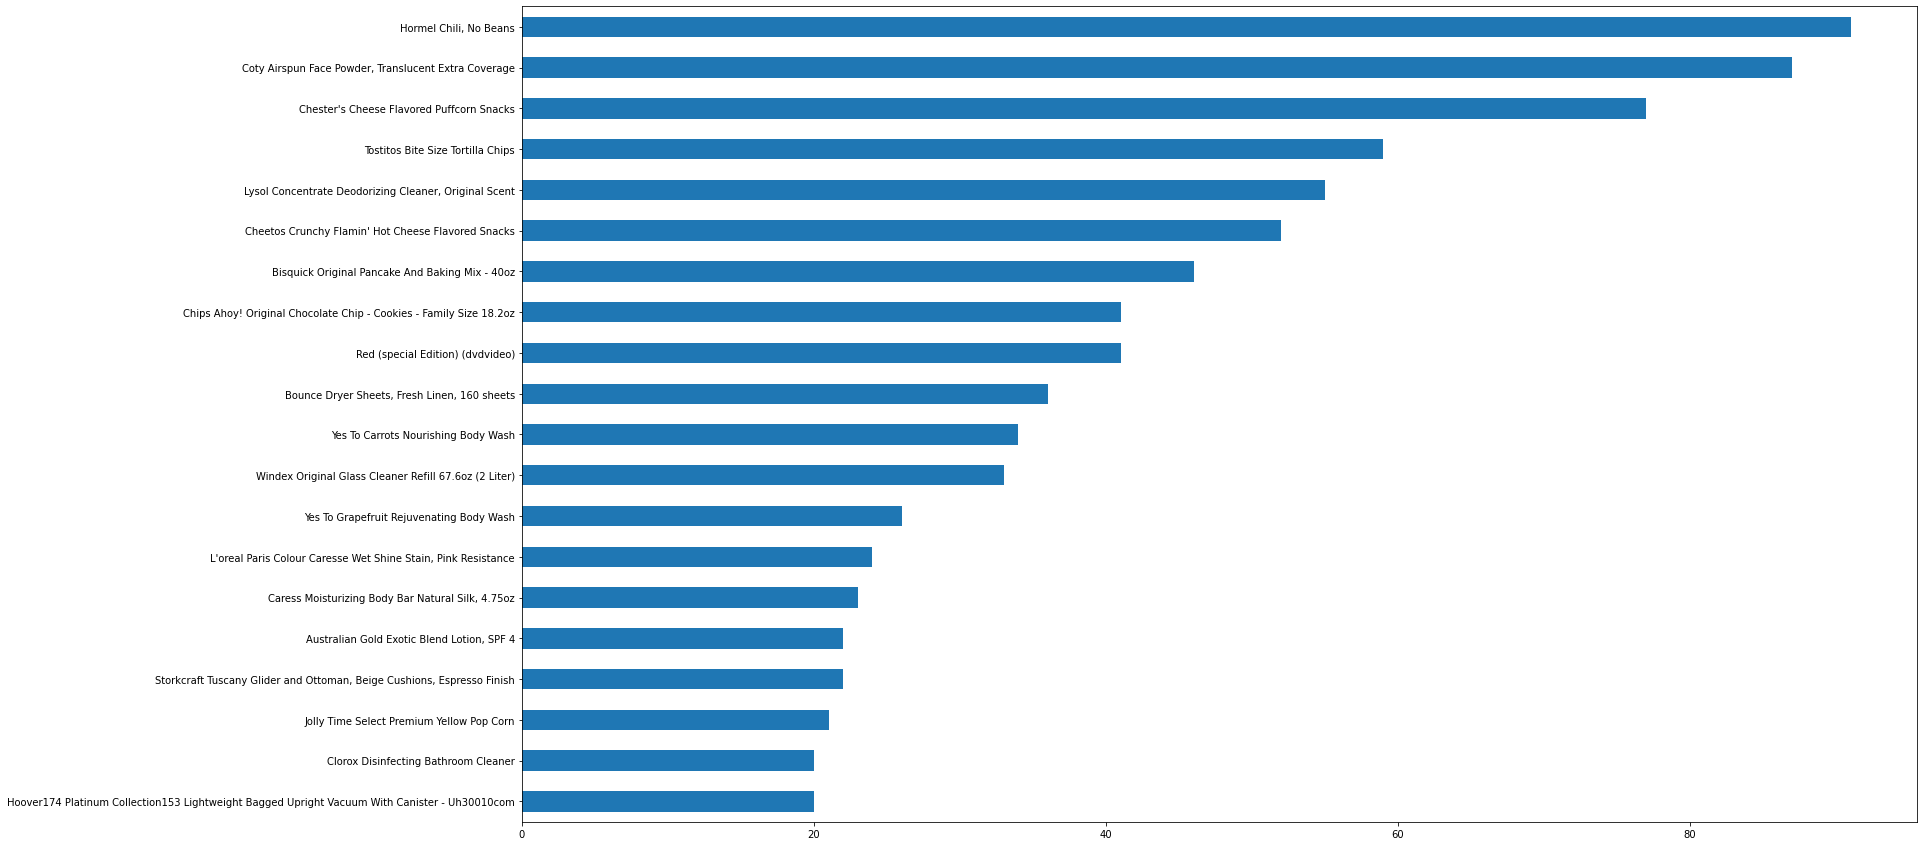

In [19]:
#Checking top 10 most purchased product
purchased_result = df[df['reviews_didPurchase'] == True]
purchased_result['name'].value_counts()[0:20].plot(kind = 'barh',figsize=[25,15]).invert_yaxis()

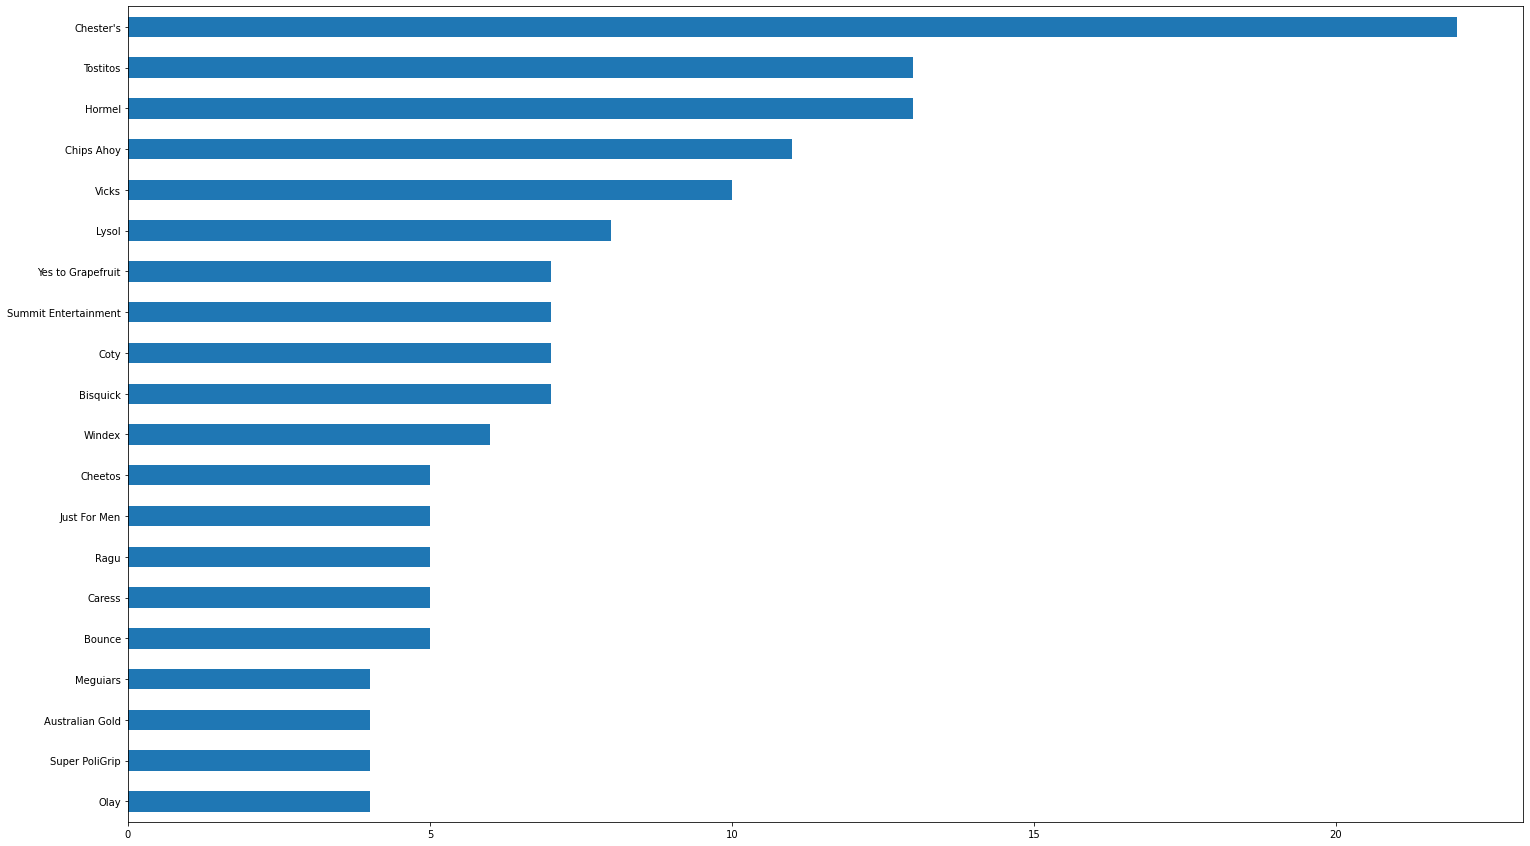

In [20]:
#Checking top 10  badly rated brands (depending upon the negative review)
negative_result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Negative")]
negative_result['brand'].value_counts()[0:20].plot(kind = 'barh', figsize=[25,15]).invert_yaxis()

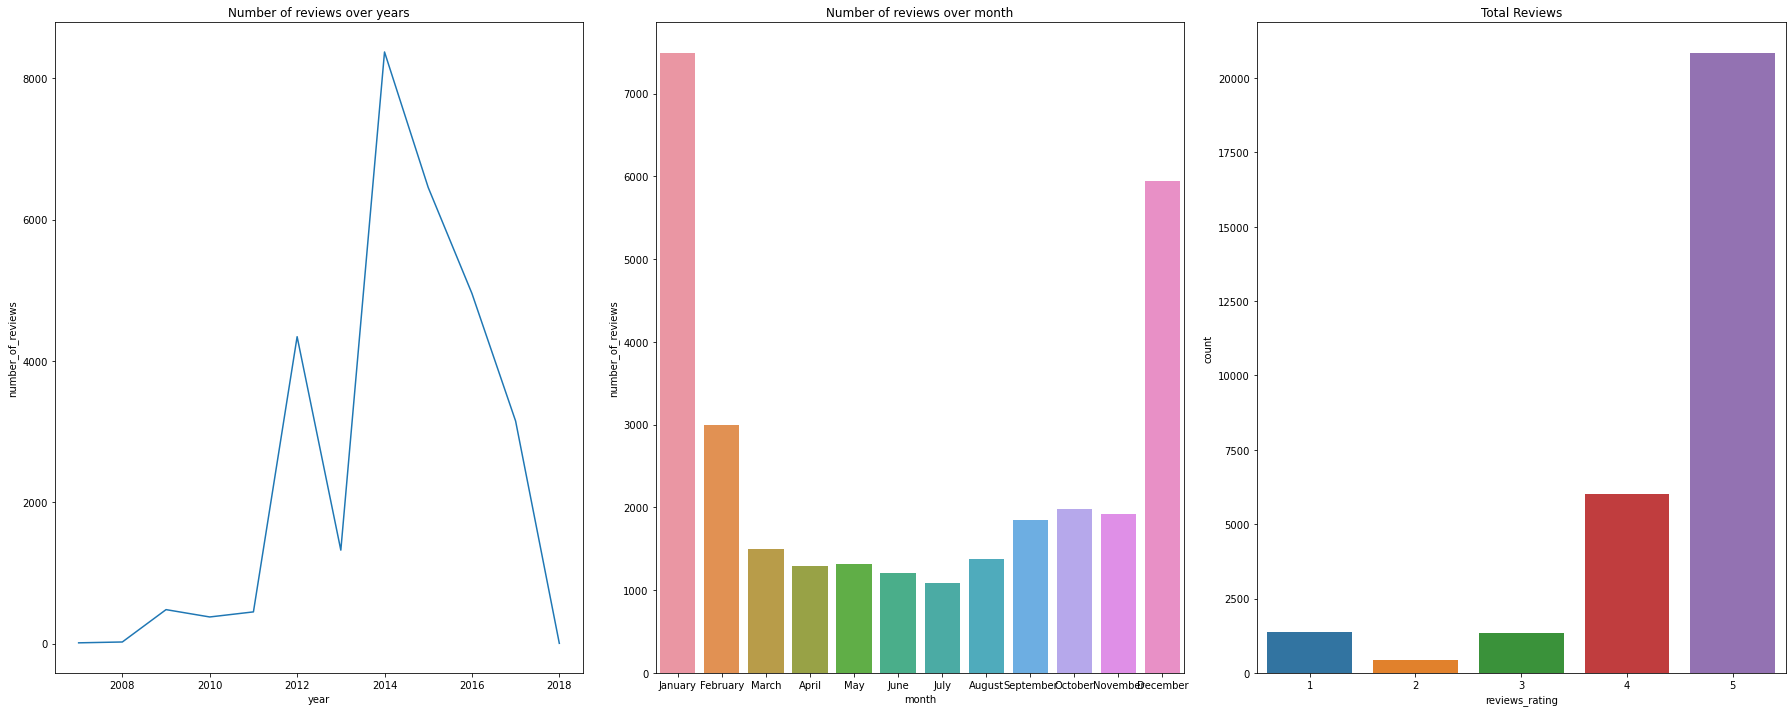

In [21]:
#breaking the date colums into days, months, years
df['reviews_only_date'] = df['reviews_date'].str[:10]
df['reviews_only_date'] = pd.to_datetime(df['reviews_only_date'], errors='coerce').dt.date
df['reviews_only_date'].fillna(df['reviews_only_date'].value_counts().idxmax(),inplace=True)
df['reviews_only_date'] = pd.to_datetime(df.reviews_only_date, format='%Y-%m-%d')


df['month'] = df['reviews_only_date'].dt.month
df['year'] = df['reviews_only_date'].dt.year
fig, axes = plt.subplots(1,3, figsize=(25,10))

yearly = df.groupby(['year'])['reviews_username'].count().reset_index()
yearly = yearly.rename(columns={'reviews_username':'number_of_reviews'})
year_Chart = sns.lineplot(x='year',y='number_of_reviews',data=yearly, ax = axes[0])
year_Chart.set_title('Number of reviews over years')

monthly = df.groupby(['month'])['reviews_username'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviews_username':'number_of_reviews'})
month_Chart = sns.barplot(x='month',y='number_of_reviews',data=monthly, ax = axes[1])
month_Chart.set_title('Number of reviews over month')

#estimating the overall ratings for all products
sns.countplot(x = 'reviews_rating', data = df, ax = axes[2] ).set_title('Total Reviews')

fig.tight_layout()

There is a tremendous increase in the ratings that are give by the users in the year 2014, most of the users have give rating of 5 and 4 but very few of them gave a bad rating

### will check the ratings vs the prodct distribution analysis

In [22]:
ratings_distribution=pd.DataFrame(df.groupby('id')['reviews_rating'].mean())
ratings_distribution['Number_Of_Ratings']=pd.DataFrame(df.groupby('id')['reviews_rating'].count())
ratings_distribution.head(10)

,reviews_rating,Number_Of_Ratings
id,,
AV13O1A8GV-KLJ3akUyj,5.000000,1
AV14LG0R-jtxr-f38QfS,5.000000,2
AV16khLE-jtxr-f38VFn,2.518519,27
AV1YGDqsGV-KLJ3adc-O,4.129310,348
AV1YIch7GV-KLJ3addeG,5.000000,1
AV1YlENIglJLPUi8IHsX,4.411765,17
AV1YmBrdGV-KLJ3adewb,4.666667,18
AV1YmDL9vKc47QAVgr7_,4.213483,89
AV1Ymf_rglJLPUi8II2v,4.882353,34


In [23]:
ratings_distribution.describe()

,reviews_rating,Number_Of_Ratings
count,271.000000,271.000000
mean,4.374025,110.701107
std,0.749857,586.875174
min,1.000000,1.000000
25%,4.127155,3.000000
50%,4.600000,8.000000
75%,4.909091,29.000000
max,5.000000,8545.000000


Text(0.5, 1.0, 'Count of Each Rating')

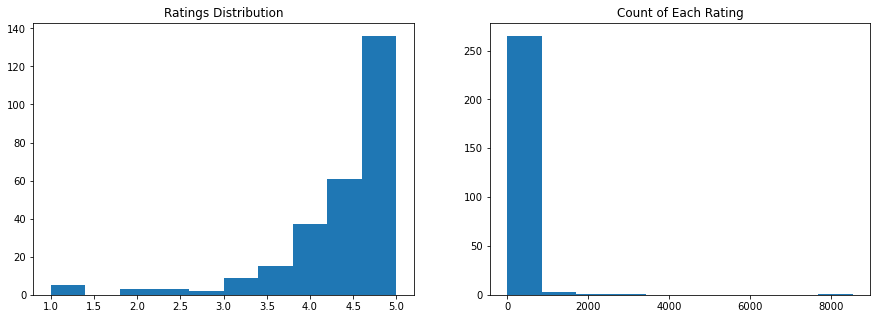

In [24]:
#analysisng the ratings count vs its distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ratings_distribution.reviews_rating)
plt.title('Ratings Distribution')

plt.subplot(1,2,2)
plt.hist(ratings_distribution.Number_Of_Ratings)
plt.title('Count of Each Rating')

### now the review data has to be analysed, we will be analysing the review length,word length, rating Vs review distributions etc 

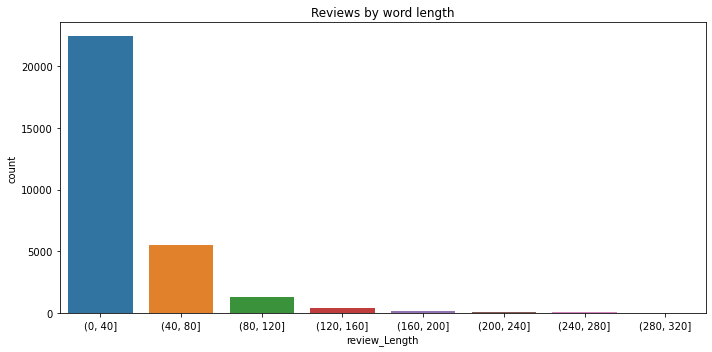

In [25]:

#review word distribution analysis
fig = plt.figure(figsize=(10,5))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['review_Length'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_word_length = df_reviews.groupby(pd.cut(df_reviews.review_Length, np.arange(0,340,40))).count()
reviews_word_length = reviews_word_length.rename(columns={'review_Length':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='review_Length',y='count',data=reviews_word_length)
reviewLengthChart.set_title('Reviews by word length')
fig.tight_layout()

customers always tend to give short reviewes

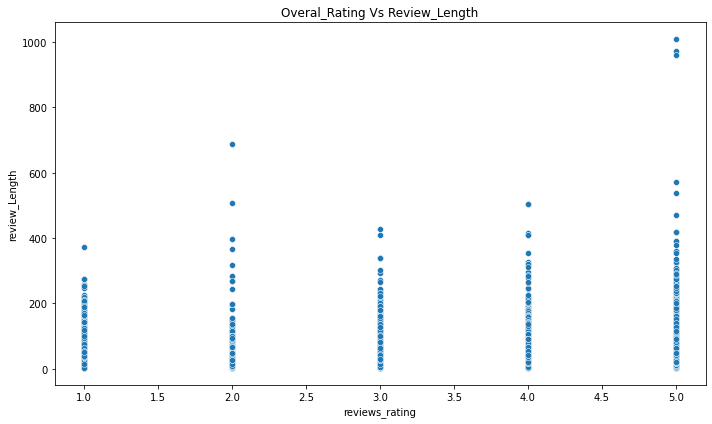

In [26]:
#distribution of the reviewes based on the length of the review and the ratings
fig = plt.figure(figsize=(10,6))
review_Length_vs_Rating = df_reviews[['id','review_Length','reviews_rating']]
review_Length_vs_Rating = sns.scatterplot(x='reviews_rating', y='review_Length', data=review_Length_vs_Rating)
review_Length_vs_Rating.set_title('Overal_Rating Vs Review_Length')
fig.tight_layout()

## NLP Analysis of the reviewes

In [27]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
#extracting the duplicate users that has given the reviewes
duplicates = df[df.duplicated(subset={"reviews_username","id"})]
duplicates.reviews_username.value_counts()

byamazon customer    39
mike                 24
chris                19
tony                  7
dave                  6
                     ..
monigurl856           1
jenc0ates             1
dmgeary               1
hurleygirl123         1
kyla416               1
Name: reviews_username, Length: 2116, dtype: int64

In [29]:
#customer with  duplicates
df[df['reviews_username'] == 'mike']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_only_date,month,year
1295,AV1Ys0kTvKc47QAVgx1C,Meguiars,"Home,Home Improvement,Automotive,Car Cleaning,...",Parts,Meguiar's Deep Crystal Car Wash 64-Oz.,2015-12-08T00:00:00.000Z,False,True,5,exactly what I ordered,car wash,mike,Positive,2015-12-08,12,2015
1339,AV1YtGjdglJLPUi8IOfJ,Banana Boat,"Personal Care,Makeup,Bronzer,Beauty,Skin Care,...",Energizer Personal Care,Banana Boat Sunless Summer Color Self Tanning ...,2015-01-24T00:00:00.000Z,False,True,5,"I have tried dozens of self tanner's, BB self ...","BB Sunless Tanning Lotion, YES, YES, YES !!!",mike,Positive,2015-01-24,1,2015
1880,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-29T00:00:00.000Z,Null,True,3,Was a so so comedy for me. Could have been fun...,OK,mike,Negative,2016-12-29,12,2016
1947,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-10-30T00:00:00.000Z,Null,True,4,This movie has its ups and downs some really f...,Good comedy,mike,Positive,2016-10-30,10,2016
1973,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-10-31T00:00:00.000Z,Null,True,4,"Great premises and a great cast, however it ju...",Super funny,mike,Positive,2016-10-31,10,2016
2286,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-03T00:00:00.000Z,Null,True,5,I saw this in the theatre and found it to be h...,Extremely funny movie!,mike,Negative,2016-12-03,12,2016
2496,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2017-03-31T00:00:00.000Z,Null,True,5,"Great movie, enjoyed this one very much. Will ...",Great Movie!,mike,Positive,2017-03-31,3,2017
2643,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2017-01-06T00:00:00.000Z,Null,True,3,I liked the movie and added it to my library a...,Funny movie,mike,Positive,2017-01-06,1,2017
2702,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2016-08-06T00:00:00.000Z,Null,True,4,Let just say that the wife enjoyed it and thus...,Wife enjoyed it,mike,Positive,2016-08-06,8,2016
5420,AVpf0thK1cnluZ0-r8vR,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Warner Home Video,100:Complete First Season (blu-Ray),2014-10-29T00:00:00.000Z,Null,True,4,This series is interesting and keeps you watch...,Great way to catch up,mike,Positive,2014-10-29,10,2014


we can see that the customer 'mike' has gave the multiple product reviews at the same time, which is not possible.
the reviewes are give for different varaties of the same produc, hence they can be  counted as multiple products.
To overcome this let us take the avarage of the ratings to avoid confusion

In [30]:
# calculating the average ratings
df['avg_ratings'] = df.groupby(['id','reviews_username'])['reviews_rating'].transform('mean')
df['avg_ratings']=df['avg_ratings'].round(3)
df[['id','reviews_username','reviews_rating','avg_ratings']]

,id,reviews_username,reviews_rating,avg_ratings
0,AV13O1A8GV-KLJ3akUyj,joshua,5,5.0
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
3,AV16khLE-jtxr-f38VFn,rebecca,1,1.0
4,AV16khLE-jtxr-f38VFn,walker557,1,1.0
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,laurasnchz,5,5.0
29996,AVpfW8y_LJeJML437ySW,scarlepadilla,5,5.0
29997,AVpfW8y_LJeJML437ySW,liviasuexo,5,5.0
29998,AVpfW8y_LJeJML437ySW,ktreed95,5,5.0


In [31]:
#Removing all the duplicates having the same product id and username.
dfFinal =  df.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [32]:
#let us verify whether removing actually worked or not
dfFinal[dfFinal['reviews_username'] == 'mike']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_only_date,month,year,avg_ratings
1295,AV1Ys0kTvKc47QAVgx1C,Meguiars,"Home,Home Improvement,Automotive,Car Cleaning,...",Parts,Meguiar's Deep Crystal Car Wash 64-Oz.,2015-12-08T00:00:00.000Z,False,True,5,exactly what I ordered,car wash,mike,Positive,2015-12-08,12,2015,5.000
1339,AV1YtGjdglJLPUi8IOfJ,Banana Boat,"Personal Care,Makeup,Bronzer,Beauty,Skin Care,...",Energizer Personal Care,Banana Boat Sunless Summer Color Self Tanning ...,2015-01-24T00:00:00.000Z,False,True,5,"I have tried dozens of self tanner's, BB self ...","BB Sunless Tanning Lotion, YES, YES, YES !!!",mike,Positive,2015-01-24,1,2015,5.000
1880,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-29T00:00:00.000Z,Null,True,3,Was a so so comedy for me. Could have been fun...,OK,mike,Negative,2016-12-29,12,2016,4.200
2643,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2017-01-06T00:00:00.000Z,Null,True,3,I liked the movie and added it to my library a...,Funny movie,mike,Positive,2017-01-06,1,2017,3.500
5420,AVpf0thK1cnluZ0-r8vR,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Warner Home Video,100:Complete First Season (blu-Ray),2014-10-29T00:00:00.000Z,Null,True,4,This series is interesting and keeps you watch...,Great way to catch up,mike,Positive,2014-10-29,10,2014,4.000
13842,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-25T00:00:00.000Z,False,True,5,Not only good for the house but the car also. ...,Great for the go,mike,Positive,2012-01-25,1,2012,5.000
15462,AVpf5olc1cnluZ0-tPrO,Chester's,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Frito-Lay,Chester's Cheese Flavored Puffcorn Snacks,2016-05-08T00:00:00.000Z,False,True,5,Better than its bigger brother Cheetos cheese ...,Better than its,mike,Positive,2016-05-08,5,2016,5.000
18055,AVpfCuzrilAPnD_xTroT,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Sn...",Frito-Lay,Tostitos Simply Blue Corn Tortilla Chips,2016-06-26T00:00:00.000Z,True,True,5,These ORGANIC chips dip easily and taste great...,!!! ORGANIC from Tostitios !!!,mike,Positive,2016-06-26,6,2016,5.000
18189,AVpfD9xTLJeJML431ig2,FOX,"Movies, Music & Books,Movies,Comedy,Movies & T...",20th Century Fox,There's Something About Mary (dvd),2015-01-16T00:00:00.000Z,Null,True,5,Classic comedy from the 1990's. Great selectio...,hilarious,mike,Positive,2015-01-16,1,2015,5.000
18296,AVpfE7puilAPnD_xUcCW,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",South Shore,Bilbao Nightstand Gray Oak - South Shore,2014-12-20T00:00:00Z,Null,Null,1,1) This product was missing pieces. Not screws...,Horrible construction,mike,Positive,2014-12-20,12,2014,1.000


In [33]:
#let us compute the reduction in the data after removing the duplicates
size_diff = dfFinal['id'].size/df['id'].size
print("%.2f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data after removing is ",dfFinal['id'].size," rows ")

7.98 % reduction in data after deleting duplicates
Size of data after removing is  27605  rows 


As the reviewes is a text data, we need to apply some NLP techniques to analyze the sentement of the users.
Also we need to combine few columns like review tittle and review text to get the hang of the sentement what the customer is talking about

In [34]:
#combing the columns
dfFinal['reviews_title'] = dfFinal['reviews_title'].fillna('')
dfFinal['user_reviews'] = dfFinal[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')
dfFinal[['reviews_title','reviews_text','user_reviews']]

,reviews_title,reviews_text,user_reviews
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome. i love this album. it's very goo...
1,Good,Good flavor. This review was collected as part...,Good. Good flavor. This review was collected a...
3,Disappointed,I read through the reviews on here before look...,Disappointed. I read through the reviews on he...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation. My husband bought this gel for us....
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it. My boyfriend and I bought this t...
...,...,...,...
29995,Softness!!,I got this conditioner with Influenster to try...,Softness!!. I got this conditioner with Influe...
29996,I love it,"I love it , I received this for review purpose...","I love it. I love it , I received this for rev..."
29997,Hair is so smooth after use,First of all I love the smell of this product....,Hair is so smooth after use. First of all I lo...
29998,Perfect for my oily hair!,I received this through Influenster and will n...,Perfect for my oily hair!. I received this thr...


In [35]:
#StopWords removal
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#All the stopwords in English language
stop = stopwords.words('english') 
from nltk.stem import SnowballStemmer


In [36]:
# custome function for Punctuation removal
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)

In [37]:
#customer function for HTML Tag remover
import re 
def striphtml(data):
#Find this kind of pattern
    p = re.compile('<.*?>')
    return p.sub('',data)

In [38]:
#initialising snowball stemmer
snow = SnowballStemmer('english') 
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [39]:
def lemmatize_sentence(sentence):
    #performing tokenization to find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #stem the words if no lema is found
            lemmatized_sentence.append(snow.stem(word))
        else:
            #with the help of tag, lematise the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [40]:
#performing sample preprocessing on one review point
#performing of lower case, HTML tag removal and removal of punctuations
def preprocessText(text, stem=False):
  text=text.lower()
  text = striphtml(text)
  text = strippunc(text)
  return lemmatize_sentence(text)

In [41]:
df_main = dfFinal.copy(deep = True)
df_main['Review'] = df_main['user_reviews'].map(preprocessText)
df_main.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_only_date,month,year,avg_ratings,user_reviews,Review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012-11-30,11,2012,5.0,Just Awesome. i love this album. it's very goo...,just awesome i love this album it very good mo...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017-07-09,7,2017,5.0,Good. Good flavor. This review was collected a...,good good flavor this review be collect as par...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,2016-01-06,1,2016,1.0,Disappointed. I read through the reviews on he...,disappointed i read through the review on here...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,2016-12-21,12,2016,1.0,Irritation. My husband bought this gel for us....,irritation my husband buy this gel for us the ...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative,2016-04-20,4,2016,1.0,Not worth it. My boyfriend and I bought this t...,not worth it my boyfriend and i buy this to sp...
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,raeanne,Negative,2016-02-08,2,2016,1.0,Disappointing. Bought this earlier today and w...,disappoint buy this early today and be excite ...
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,kimmie,Negative,2016-02-21,2,2016,1.0,Not happy at all. I bought this product for my...,not happy at all i buy this product for my hus...
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,cassie,Negative,2016-03-28,3,2016,1.0,Very disappointing. My husband and I bought th...,very disappointing my husband and i buy this f...
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,moore222,Positive,2016-03-21,3,2016,1.0,Don't buy. Got as a surprise for my husband th...,dont buy get as a surprise for my husband ther...
10,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-08T00:00:00.000Z,False,False,1,tried it with my husband and felt no different...,pretty dissapoitned,jds1992,Negative,2016-04-08,4,2016,1.0,pretty dissapoitned. tried it with my husband ...,pretty dissapoitned try it with my husband and...


### FInding the words that often appear in the reviews

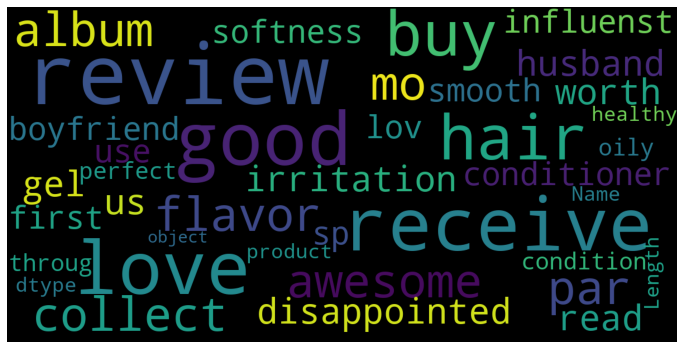

In [42]:
stopwords = set(STOPWORDS)
#definng custom function to create cloud word 
def show_word_cloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words =150,
        max_font_size=50, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=16)
        fig.subplots_adjust(top=2.5)
    plt.imshow(wordcloud)
    plt.show()

show_word_cloud(df_main['Review'])

### Performing Sentiment Analysis on the reviewes

In [43]:
#importing the required libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
from pathlib import Path

In [44]:
#droping useless columns
df_main=df_main[['Review','reviews_rating','user_sentiment']]
data=df_main
df_main.head(5)

,Review,reviews_rating,user_sentiment
0,just awesome i love this album it very good mo...,5,Positive
1,good good flavor this review be collect as par...,5,Positive
3,disappointed i read through the review on here...,1,Negative
4,irritation my husband buy this gel for us the ...,1,Negative
5,not worth it my boyfriend and i buy this to sp...,1,Negative


In [45]:
# saving the data 
pickle.dump(data, open("data.pkl","wb"))

In [46]:
#using the tfidf_vectorizer 
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['Review'])
X = tfidf_vectorizer.transform(data['Review'])
y = data['user_sentiment']

# Saving the vocabulary used in the vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# performing train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

before performing the model fitting , we will check if there is any class imbalace that is present in the dataset or not, if there is class imbalance then we need to use the following technigues to mitigate it

In [47]:
data.groupby(['user_sentiment']).count()

,Review,reviews_rating
user_sentiment,,
Negative,3058,3058
Positive,24547,24547


from the above we can see that there is a class imbalance present in the dataset to handell this we use SMOTE techineque

In [48]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("Before the technique", counter)

#oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After the technique", counter)

Before the technique Counter({'Positive': 18454, 'Negative': 2249})
After the technique Counter({'Negative': 18454, 'Positive': 18454})


In [49]:
#creating custome function to analyse the confusion matrix
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g') 
    print(classifier)
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

### Model Evaluation 
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

We will select one best performing model out of these four models


In [50]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import BernoulliNB
from scipy.spatial.distance import cosine
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

### Logestic Regression Model

In [51]:
for c in [0.005, 0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sm, y_train_sm)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))

Sensitivity for C = 0.005 is 0.8148695224027572
Specificity for C = 0.005 is 0.7292954264524104
Sensitivity for C = 0.01 is 0.8189725914984408
Specificity for C = 0.01 is 0.7317676143386898
Sensitivity for C = 0.05 is 0.8347283768258658
Specificity for C = 0.05 is 0.7453646477132262
Sensitivity for C = 0.25 is 0.8737895946167733
Specificity for C = 0.25 is 0.7181705809641533
Sensitivity for C = 0.5 is 0.8959461677334646
Specificity for C = 0.5 is 0.695920889987639
Sensitivity for C = 1 is 0.9158050221565731
Specificity for C = 1 is 0.657601977750309


from the above, the value for C is optimal at 0.5

LogisticRegression(C=0.05)
Accuracy is  0.8242538394668212
Sensitivity is 0.8347283768258658
Specificity is 0.7453646477132262


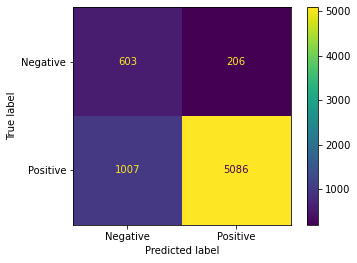

In [52]:
final_lr = LogisticRegression(C=0.05)
final_lr.fit(X_train_sm, y_train_sm)
display_score(final_lr)

In [53]:
# now we will se the scores associate with the positive and negative words
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr.coef_[0])
}
#printing the positive words
print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
#printing the negative words
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 4.246796072628531)
('love', 3.2984563115881573)
('clean', 2.6041573514702363)
('good', 2.4694125384732906)
('easy', 2.2035358068683024)
('and', 2.0450513614044086)
('best', 1.9397363261831109)
('easy to', 1.4795458452800978)
('be great', 1.4452314450955965)
('more', 1.2801998880214636)
Negative Words
('bad', -2.151792421431918)
('not', -1.6725166097300814)
('evil', -1.5719303997171976)
('resident evil', -1.462467992158884)
('resident', -1.4540362954111825)
('formula', -1.3468891358284907)
('horrible', -1.3058834490145277)
('like', -1.1245570942228251)
('disappointed', -1.0498171150932067)
('yummy', -0.9615042512038627)


In [54]:
# now we will be saving the model
pickle.dump(final_lr, open('final_lr.pkl', 'wb'))
# saving the vectorizer weights
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))

### Naive-Byes Model



MultinomialNB()
Accuracy is  0.8526514053897422
Sensitivity is 0.890365993763335
Specificity is 0.5686032138442522


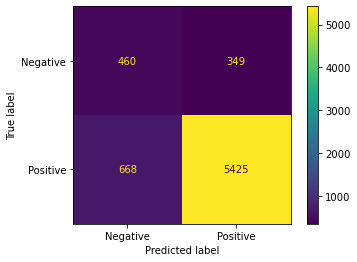

In [55]:
# Fitting on the Naive Bayes Model
nb=MultinomialNB()
nb.fit(X_train_sm, y_train_sm)
#checking the test data performance metrics
display_score(nb)

### Random Forest Model

RandomForestClassifier()
Accuracy is  0.8856853086062011
Sensitivity is 0.9878549154767766
Specificity is 0.1161928306551298


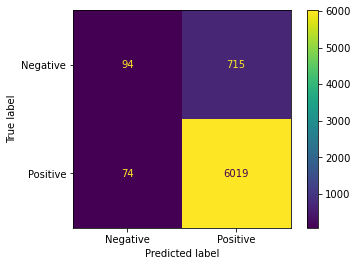

In [56]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
#fitting the model with default hyper parameters
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
display_score(rf)

now we performe hyper parameter tuning to the model

In [57]:
#hyper parameters for the model
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}


# based model
final_rf = RandomForestClassifier()

# grid search algorithm on the base model
rf_tuned = GridSearchCV(estimator = final_rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}
Best AUC-ROC Score on train data:  0.8610964893970242
GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)
Accuracy is  0.7906403940886699
Sensitivity is 0.8481864434597078
Specificity is 0.3572311495673671


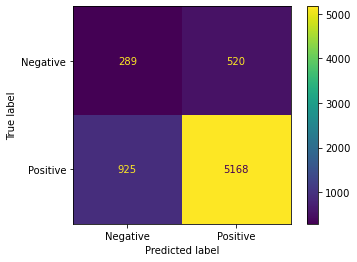

In [58]:
# print the best hyperparameters and AUC-ROC score
print("Best hyperparameters: ", rf_tuned.best_params_)
print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)

#performance metrics on the test data
display_score(rf_tuned)

### XG Boost Classifier Model


Initially we will use the default hyperparameters to fit the mdoel and then we will do a hyperparameter tunning

[21:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy is  0.8978556940017386
Sensitivity is 0.9532250123092073
Specificity is 0.48084054388133496


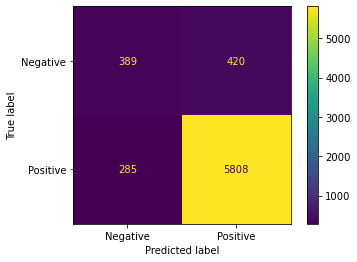

In [59]:
# importing libraries
import xgboost as xgb
from xgboost import XGBClassifier

final_xgb = XGBClassifier(booster='gbtree')
final_xgb.fit(X_train_sm, y_train_sm)

#Confusion matrix scores
display_score(final_xgb)

In [60]:
#custome hyper parameter tunning

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

final_xgb = XGBClassifier(booster='gbtree')

# Grid search CV Algorithm on the model
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[21:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:56:40]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}
Best AUC-ROC Score on train data:  0.8309698099189555
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_la

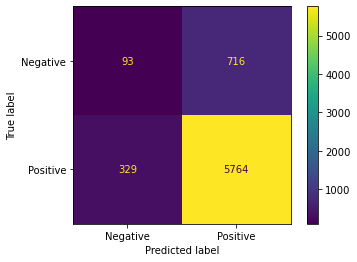

In [61]:
# printing the best hyperparameters and AUC-ROC scores
print("Best hyperparameters: ", xgb_tuned.best_params_)
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
#Confusion matrix scors
display_score(xgb_tuned)

### comparing the different models

In [62]:
results = {('LR'):[0.83, 0.85, 0.74], ('NB'):[0.86, 0.89, 60], ('XGB'):[0.90, 0.94, 0.59], ('XGB Tuned'):[0.85, 0.87, 0.64],
 ('RF'):[0.91, 0.99, 0.23], ('RF Tuned'):[0.81, 0.86, 0.36]}
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity'])

,LR,NB,XGB,XGB Tuned,RF,RF Tuned
Accuracy,0.83,0.86,0.90,0.85,0.91,0.81
Sensitivity,0.85,0.89,0.94,0.87,0.99,0.86
Specificity,0.74,60.00,0.59,0.64,0.23,0.36


In [63]:
# Saving the best trained model as a pickle string
saved_model = pickle.dump(final_lr, open('logistic_regression.pkl', 'wb'))
saved_model_2 = pickle.dump(final_lr, open('xgb_tuned.pkl', 'wb'))


## Recomendation System

we have may types of recomendation systems like.
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

In [64]:
from sklearn.metrics.pairwise import pairwise_distances
ratings = pd.read_csv("sample30.csv", sep=',')
ratings.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive


In [65]:
ratings=ratings[['id', 'reviews_rating', 'reviews_username']]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [66]:
ratings = ratings[~ratings.reviews_username.isna()]
ratings.columns=['productId', 'rating', 'user']
ratings.head()

,productId,rating,user
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


Dividing the data into test and train split

In [67]:
train, test = train_test_split(ratings, test_size=0.30, random_state=12)
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [68]:
# creating a pivot table train ratings' dataset into matrix format
# The columns are products and the rows are user IDs
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(0)

df_pivot.head(3)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating the dummy test and train split dataset so that this can be used in the future.
The products rated by user are marked as 0 during the predection and the products that are not rated by the user are rated as 1

In [69]:
# creating a copy of the train dataset into dummy_train
dummy_train = train.copy()
dummy_train.head(10)

,productId,rating,user
27729,AVpfRTh1ilAPnD_xYic2,5,stevieboy23
17120,AVpf9pzn1cnluZ0-uNTM,5,byo.kelly
22028,AVpfnRuSilAPnD_xfB8l,3,linda h
16308,AVpf63aJLJeJML43F__Q,5,cocoacrazy
19457,AVpfJP1C1cnluZ0-e3Xy,5,vanessavast
15568,AVpf5olc1cnluZ0-tPrO,5,jenny
10777,AVpf3VOfilAPnD_xjpun,5,marti39
6909,AVpf3VOfilAPnD_xjpun,4,jayme
20440,AVpfJP1C1cnluZ0-e3Xy,5,gatitata
4604,AVpf0eb2LJeJML43EVSt,4,mikefrunge30


In [70]:
# products not rated by user are marked as 1 and this will be used for the prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [71]:
# Converting the dummy dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(1)
dummy_train.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Finding the similarity between the two vectors. we use the adjusted cosine similarity to mitigate the nature tendency of the users

In [72]:
# user similarity matrix using pairwise_distance function
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [73]:
#user product matrix
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
)
df_pivot.head(10)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10ten,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11111111aaaaaaaaaaaaaaaaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#normalising the ratings of the users
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head(10)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10ten,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11111111aaaaaaaaaaaaaaaaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# user similarity matrix using pairwise_distance function
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Predictions user- user based

In [76]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.93649167,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.000000,0.000000,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
08dallas,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1.11E+24,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
10ten,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
11111111aaaaaaaaaaaaaaaaa,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [79]:
#Finding the top 20 recomendations
user_input='zyiah4'
print(user_input)
user_final_rating.head(5)

zyiah4


productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [80]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

productId
AVpfvieo1cnluZ0-qdnu    0.0
AVpf0kZFilAPnD_xi5QZ    0.0
AVpf5ZcH1cnluZ0-tL9V    0.0
AVpf5Z1zLJeJML43FpB-    0.0
AVpf5FF71cnluZ0-tHAV    0.0
AVpf5CnILJeJML43FjaU    0.0
AVpf4oLxLJeJML43FcxC    0.0
AVpf4WWN1cnluZ0-s7Wj    0.0
AVpf3okQLJeJML43FMif    0.0
AVpf3VOfilAPnD_xjpun    0.0
AVpf385g1cnluZ0-s0_t    0.0
AVpf2tw1ilAPnD_xjflC    0.0
AVpf1pwXLJeJML43EqpT    0.0
AVpf0thK1cnluZ0-r8vR    0.0
AVpf0pfrilAPnD_xi6s_    0.0
AVpf0eb2LJeJML43EVSt    0.0
AVpe8xjUilAPnD_xRkxC    0.0
AVpf0YhQLJeJML43ETff    0.0
AVpf0O60ilAPnD_xizE6    0.0
AVpf-lMV1cnluZ0-ub0_    0.0
Name: zyiah4, dtype: float64

### Evaluation of User _User
Item based similarity

In [81]:
#Taking the transpose of the rating matrix to normalize the rating
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).T
df_pivot.head(5)

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#normalizing the products ratings for each product
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#finding the cosine similarity using the pairwise distance
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
print(item_correlation.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(251, 251)


In [84]:
#filtering the corelation for the values greater than 0
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### predection item item 

In [85]:
#predection item item 
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00666715, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00693369],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00554695]])

In [86]:
#Filterning the ratings only for the products that are not rated by the users
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.006364,0.0,0.000000,...,0.0,0.014313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.006667,0.0,0.0,0.0,0.0,0.004563,0.000000,0.0,0.000896,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.011112,0.0,0.0,0.0,0.0,0.007606,0.000000,0.0,0.001493,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.008890,0.0,0.0,0.0,0.0,0.006084,0.000000,0.0,0.001195,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#finding the top 20 recomendation for the users
user_input='00dog3'
print(user_input)
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

00dog3


productId
AVpe41TqilAPnD_xQH3d    0.047425
AVpe5s3RLJeJML43x4eA    0.036194
AVpfOmKwLJeJML435GM7    0.035717
AVpe8gsILJeJML43y6Ed    0.024162
AVpfN6Z71cnluZ0-gZmO    0.018892
AVpfAgSp1cnluZ0-b2-K    0.015928
AVpe59io1cnluZ0-ZgDU    0.014088
AVpfJP1C1cnluZ0-e3Xy    0.008025
AVpfPaoqLJeJML435Xk9    0.007972
AVpf3VOfilAPnD_xjpun    0.006288
AVpf--o9LJeJML43G_Fq    0.000000
AVpf2tw1ilAPnD_xjflC    0.000000
AVpf5FF71cnluZ0-tHAV    0.000000
AVpf5CnILJeJML43FjaU    0.000000
AVpe_dxlilAPnD_xSiHI    0.000000
AVpf4oLxLJeJML43FcxC    0.000000
AVpf4WWN1cnluZ0-s7Wj    0.000000
AVpf3okQLJeJML43FMif    0.000000
AVpe_pDG1cnluZ0-bjSf    0.000000
AVpf385g1cnluZ0-s0_t    0.000000
Name: 00dog3, dtype: float64

In [88]:
# saving the model
pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))

### Evaluation of Item item


will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user

In [89]:
test.columns


Index(['productId', 'rating', 'user'], dtype='object')

In [90]:
common =  test[test.productId.isin(train.productId)]
common.head(5)

,productId,rating,user
19513,AVpfJP1C1cnluZ0-e3Xy,5,kanderson927
12599,AVpf3VOfilAPnD_xjpun,5,arib
1587,AVpe31o71cnluZ0-YrSD,4,karv
15380,AVpf5FF71cnluZ0-tHAV,5,xxacw12xx
25620,AVpfPaoqLJeJML435Xk9,5,cloudy83


In [91]:
common_item_based_matrix = common.pivot_table(index='user', columns='productId', values='rating').T
item_correlation_df = pd.DataFrame(item_correlation)

In [92]:
item_correlation_df['productId'] = df_subtracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
list_name = common.productId.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T

In [94]:
item_correlation_df_3.head()

,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037657,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066184,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07508529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00693369, 0.00693369, 0.01091379, ..., 0.        , 0.00693369,
        0.00277348]])

Dummy test will be used for evaluation.

In [96]:
dummy_test = common.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)
common_ = common.pivot_table(index='user', columns='productId', values='rating').T

The products not rated is marked as 0 for evaluation

In [97]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *
X  = common_item_predicted_ratings.copy() 
X = X[X>0]
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
3.5458483756836414
